# Principal Component Analysis (PCA): Intuition, Math, and When to Use It

## Intuition (Unsupervised View)
PCA is a way to **re-express** your data so that:
- The first new axis (**PC1**) captures as much variance as possible.
- The second new axis (**PC2**) captures as much of the *remaining* variance as possible, and is orthogonal to PC1.
- And so on…

Think of fitting a skinny cloud of points with a rotated coordinate system: align the first axis along the longest spread of the cloud, then the next axis along the next-longest, etc. Projecting data onto the first few axes gives a **lower-dimensional summary** that keeps the most signal and drops mostly noise.

![Scatter with PCs](https://upload.wikimedia.org/wikipedia/commons/1/15/GaussianScatterPCA.png)  
*PCA aligns axes with the directions of greatest spread (principal components).*

![Projection animation](https://upload.wikimedia.org/wikipedia/commons/9/9c/PCA_Projection_Illustration.gif)  
*Projecting points onto a principal axis.*

Common unsupervised uses:
- **Visualization:** reduce to 2D/3D for plotting.
- **Compression:** store only the first $k$ principal component scores.
- **Denoising:** discard low-variance components that often capture noise.
- **Preprocessing:** make features uncorrelated before downstream tasks.

---

## The Math (Step by Step)

### 1) Prepare your data
Let $X \in \mathbb{R}^{n \times d}$ be your data matrix (rows = samples, cols = features).  
Center each feature:
$$
\mu = \frac{1}{n}\sum_{i=1}^n X_{i:}, \quad X_c = X - \mathbf{1}\mu^\top
$$
Optionally, **standardize** each column of $X$ to unit variance if features are on very different scales.

---

### 2) Sample covariance matrix
$$
S = \frac{1}{n-1} X_c^\top X_c \quad \in \mathbb{R}^{d \times d}
$$

---

### 3) Eigendecomposition
Compute eigenpairs:
$$
S = V \Lambda V^\top
$$
where:
- $V = [v_1, \dots, v_d]$ contains orthonormal eigenvectors,
- $\Lambda = \mathrm{diag}(\lambda_1, \dots, \lambda_d)$ with $\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_d \ge 0$.

**Interpretation:**
- **PC directions:** columns $v_j$
- **Explained variance:** $\lambda_j$
- **Explained variance ratio:** $\frac{\lambda_j}{\sum_{k=1}^d \lambda_k}$

---

### 4) Project onto the first $k$ PCs
Let $V_k = [v_1, \dots, v_k]$.  
Scores (transformed data):
$$
Z = X_c V_k \quad \in \mathbb{R}^{n \times k}
$$
Reconstruction:
$$
\hat{X} = Z V_k^\top + \mathbf{1}\mu^\top
$$
Optimality property:
$$
\|X_c - X_c V_k V_k^\top\|_F^2 = \sum_{j=k+1}^d \lambda_j
$$
PCA finds the rank-$k$ projection with **minimum reconstruction error**.

---

### 5) Choosing $k$
- **Scree plot:** Plot $\lambda_j$ vs. $j$ and look for an “elbow.”
- **Cumulative explained variance:** Choose smallest $k$ such that:
$$
\frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^d \lambda_j} \ge 0.90
$$

![Scree plot](https://upload.wikimedia.org/wikipedia/commons/f/f4/Scree_Plot.png)  
*An elbow can suggest a good cutoff $k$.*

---

### 6) SVD viewpoint (often more stable)
Thin SVD:
$$
X_c = U \Sigma V^\top
$$
where $\Sigma = \mathrm{diag}(\sigma_1, \dots, \sigma_r)$, $r = \mathrm{rank}(X_c)$.  
Then:
$$
S = \frac{1}{n-1} X_c^\top X_c = V \left( \frac{\Sigma^2}{n-1} \right) V^\top
$$
So:
- Right singular vectors $V$ are PC directions.
- Eigenvalues: $\lambda_j = \frac{\sigma_j^2}{n-1}$.
- Scores: $Z = X_c V_k = U_k \Sigma_k$.

*(Optional)* **Whitening:**
$$
Z_{\text{white}} = X_c V_k \Lambda_k^{-1/2}
$$
Makes transformed features unit variance and uncorrelated.

---

## Using PCA for Regression with Many Features (PCR)

When $d$ is large or features are highly collinear, OLS can be unstable. **Principal Components Regression (PCR)** steps:

1. Fit PCA on **training** $X$ → $V_k$, transform:
$$
Z = X_c V_k
$$
2. Fit a linear model:
$$
y \approx Z \gamma
$$
3. For new data $X_{\text{new}}$:
$$
Z_{\text{new}} = (X_{\text{new}} - \mu) V_k
$$
Predict:
$$
\hat{y} = Z_{\text{new}} \hat{\gamma}
$$
Connection to original features:
$$
\hat{\beta} = V_k \hat{\gamma}
$$

**Why it helps:**
- PCs are orthogonal ⇒ no multicollinearity.
- Dropping low-variance PCs reduces variance of estimates (bias-variance tradeoff).

**Tips:**
- Fit PCA **only on training set**.
- Standardize if scales differ.
- Compare to ridge/lasso; PCR is interpretable via **loadings** (entries of $V_k$).

---

## Example: Eigenfaces
With images as long vectors (pixels as features), PCA finds “basis faces.”  
Any face $\approx$ average face + weighted sum of a few eigenfaces.

![Eigenfaces](https://upload.wikimedia.org/wikipedia/commons/6/67/Eigenfaces.png)  
*Top principal components of face images (Eigenfaces).*




# Application to Bank Customer Data
- First, we will perform PCA to see if there are any patterns within the data when reduced to a lower dimensional space
- Then, we will actually use PCA to perform a customer churn classification task

| **Feature**                | **Description**                                                                    |
| -------------------------- | ---------------------------------------------------------------------------------- |
| **Surname**                | Customer’s last name (used for TF-IDF features).                                   |
| **CreditScore**            | Numeric credit score reflecting financial reliability.                             |
| **Age**                    | Customer’s age in years.                                                           |
| **Tenure**                 | Number of years the customer has been with the bank.                               |
| **Balance**                | Account balance in local currency.                                                 |
| **NumOfProducts**          | Number of bank products held (e.g., credit cards, loans).                          |
| **HasCrCard**              | Binary flag indicating if the customer has a credit card (1 = yes).                |
| **IsActiveMember**         | Binary indicator of whether the customer is active (1 = yes).                      |
| **EstimatedSalary**        | Estimated annual income.                                                           |
| **Exited**                 | Target variable — 1 if the customer left the bank, 0 otherwise.                    |
| **Surname_tfidf_0–4**      | Numerical text features from surname TF-IDF encoding (top 5 components).           |
| **France, Germany, Spain** | One-hot encoded country of residence.                                              |
| **Female, Male**           | One-hot encoded gender.                                                            |
| **Mem__no__Products**      | Engineered ratio or interaction between membership and products.                   |
| **Cred_Bal_Sal**           | Combined feature capturing relationship between credit score, balance, and salary. |
| **Bal_sal**                | Ratio of balance to salary.                                                        |
| **Tenure_Age**             | Interaction term between tenure and age.                                           |
| **Age_Tenure_product**     | Product of age and tenure capturing long-term engagement.      

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import PCA from sklearn
# did not make it into mlpackage
#from sklearn.decomposition import PCA
import sys
sys.path.append("/Users/rykerdolese/Documents/INDE 577/Data-Science-and-Machine-Learning/src")
from mlpackage.preprocess import StandardScaler, train_test_split
from mlpackage.metrics import accuracy_score
from mlpackage import PCA

# Loading the dataset
data = pd.read_csv('churn_data.csv')
# Displaying the first few rows of the dataset
data.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

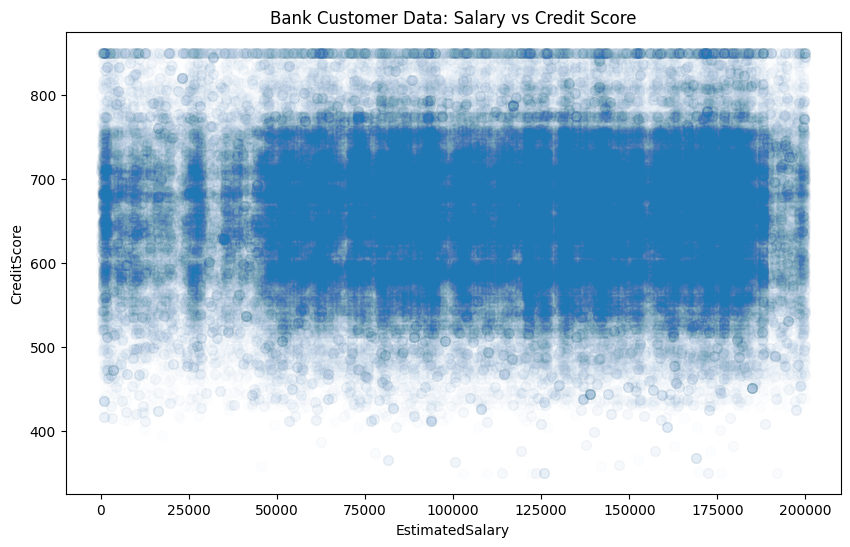

In [4]:
# Let's visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(data['EstimatedSalary'], data['CreditScore'], s=50, cmap='viridis', alpha = 0.01)
plt.xlabel('EstimatedSalary')
plt.ylabel('CreditScore')
plt.title('Bank Customer Data: Salary vs Credit Score')
plt.show()

Not much of a relationship between credit score and salary.

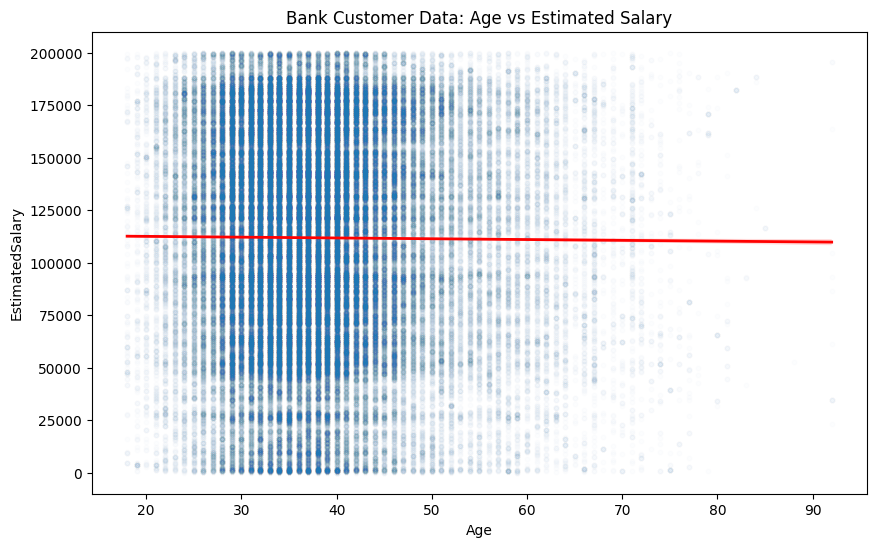

In [5]:
# Let's visualize age and salary
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='EstimatedSalary', data=data, scatter_kws={"alpha":0.01, 's':10}, line_kws={"color":"r", "lw":2})
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Bank Customer Data: Age vs Estimated Salary')
plt.show()

Not much to see there either.

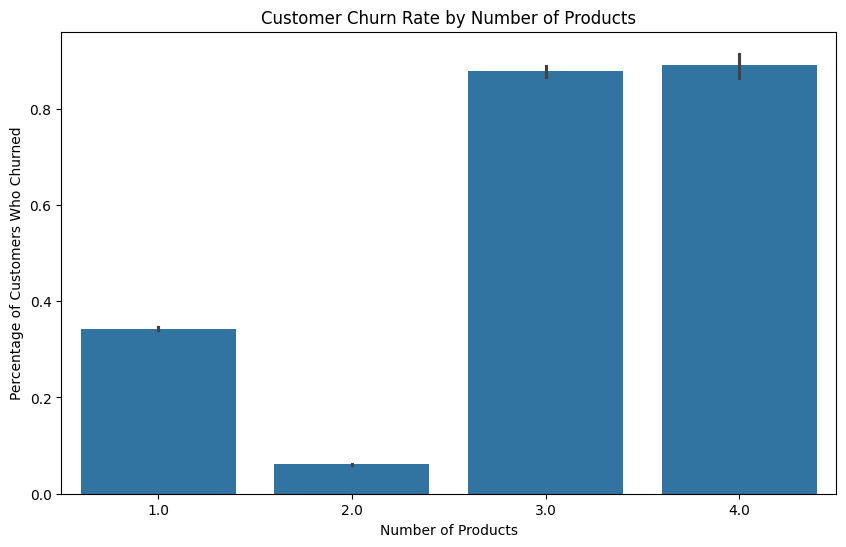

In [5]:
# Barplot of % customers who churned vs. number of products
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=data)
plt.xlabel('Number of Products')
plt.ylabel('Percentage of Customers Who Churned')
plt.title('Customer Churn Rate by Number of Products')
plt.show()

It appears that 3 & 4 products actually have greater churn rate.

## Using PCA to identify trends

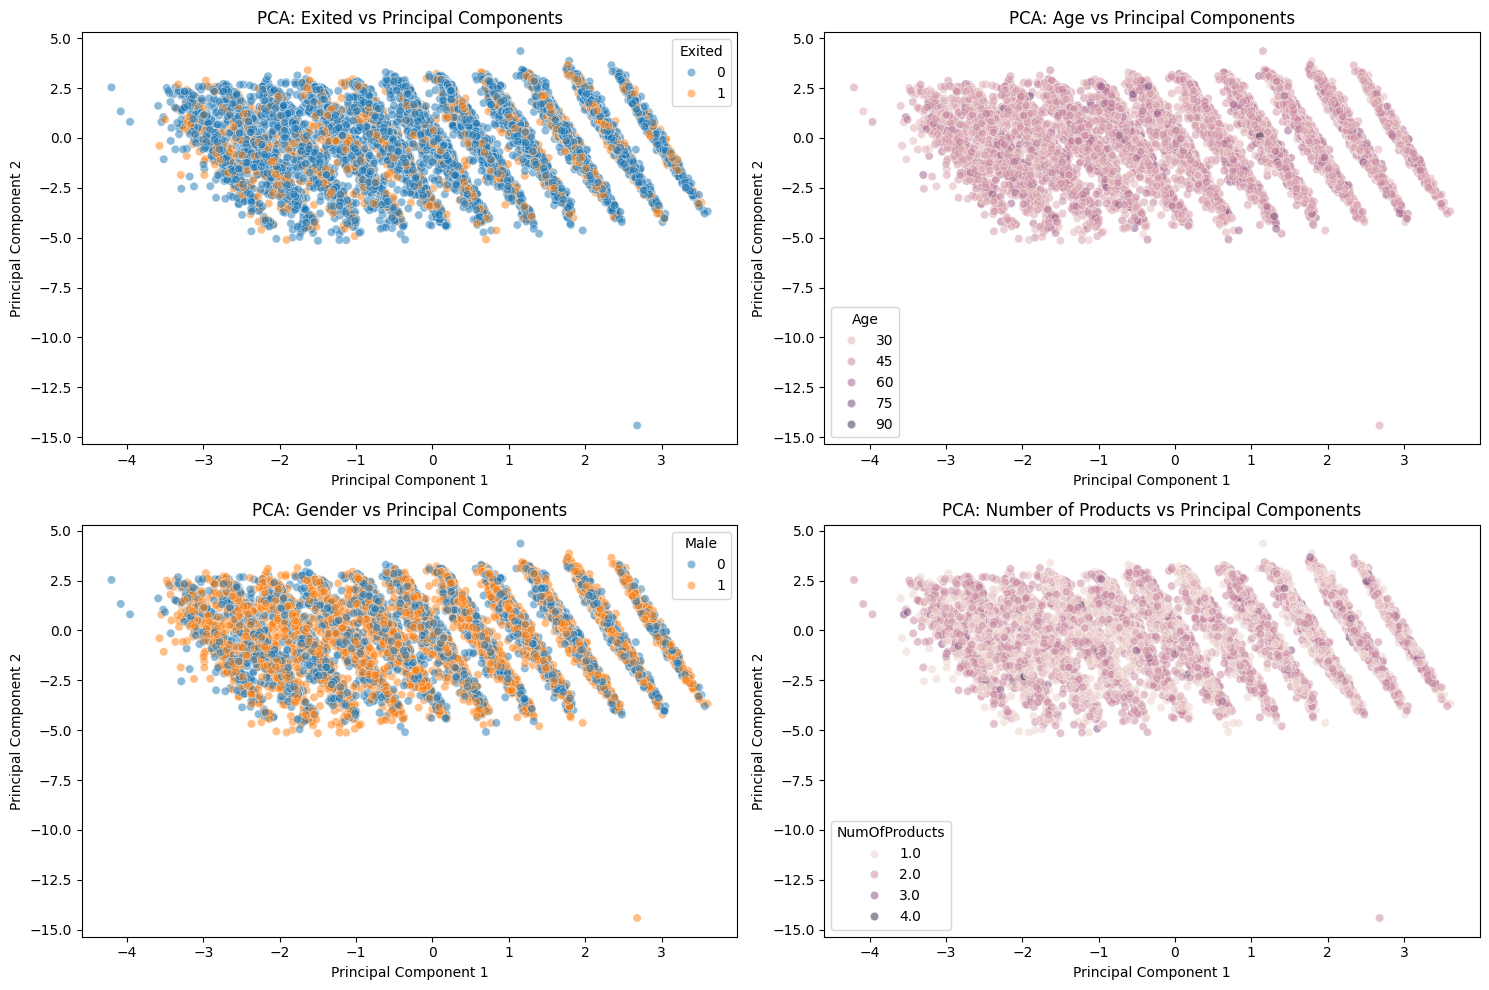

Explained Variance Ratio: [0.51178352 0.48821648]


In [3]:
# subset data for easier visualization
data_sample = data.sample(frac=0.1, random_state=42)  # Taking a sample of 10% of the data for visualization

# Standardizing the data
scaler = StandardScaler()
# scale everything for now
data_scaled = scaler.fit_transform(data_sample)

# PCA to identify trends
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])
# Adding the target variable to the PCA DataFrame
pca_df['Exited'] = data['Exited']
# Adding some other features for visualization
pca_df['Age'] = data['Age']
pca_df['Male'] = data['Male']
pca_df['NumOfProducts'] = data['NumOfProducts']

# Make 4 scatterplots of PCA results
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Exited', data=pca_df, alpha=0.5)
plt.title('PCA: Exited vs Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Age', data=pca_df, alpha=0.5)
plt.title('PCA: Age vs Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(2, 2, 3)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Male', data=pca_df, alpha=0.5)
plt.title('PCA: Gender vs Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(2, 2, 4)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='NumOfProducts', data=pca_df, alpha=0.5)
plt.title('PCA: Number of Products vs Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

No egregious patterns are obvious, but we are only capturing 20% of variation with just two principle components. There seems to be a noticeable diagonal/linear patterns between PCA 1 and 2 (maybe due to a categorical feature)

## PCA Modeling
- PCA reduces the chnces of multicolinearity and reduces the amount of features required. This also reduces model instability and potentially overfitting.

In [7]:
data = pd.read_csv('churn_data.csv')

X = data.drop(['Exited'], axis=1)
y = data['Exited']

# Standardizing the data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


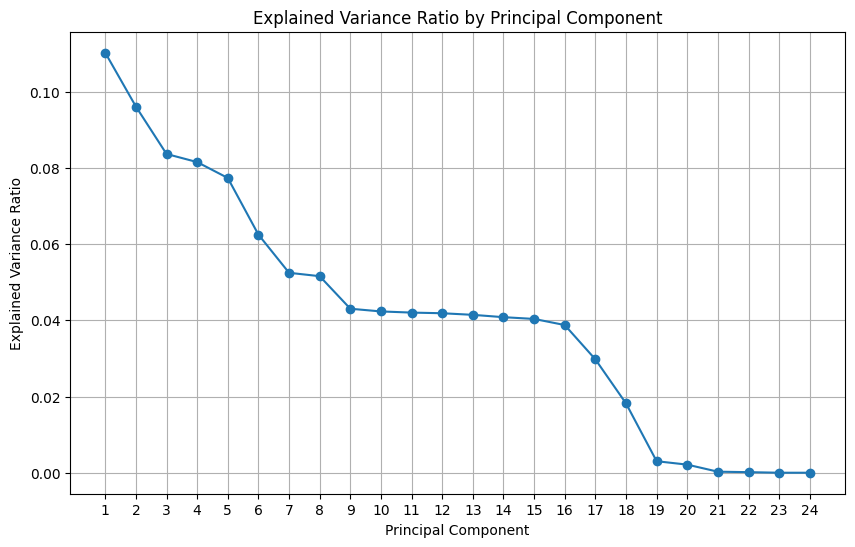

In [8]:
# Determing the number of components to keep
pca = PCA()
pca.fit(X_train_scaled)
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

Looks like 9 principal components is when it levels off. We will set K=9.

In [9]:
# Let's use our logistic regression model again, but this time with PCA applied

from mlpackage import LogisticRegression

# Apply PCA with the chosen number of components (e.g., 9)
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the logistic regression model on the PCA-transformed data
model = LogisticRegression(learning_rate=0.1, n_iterations=3000)
model.fit(X_train_pca, y_train)

Iteration 1000, Loss: 0.404461
Iteration 2000, Loss: 0.403596
Iteration 3000, Loss: 0.403596


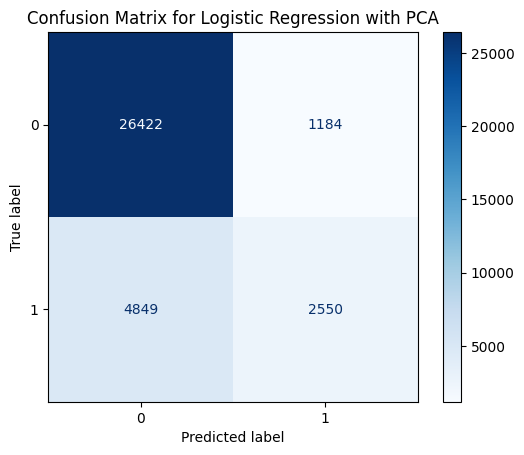

In [10]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with PCA')
plt.show()

In [13]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression with PCA: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression with PCA: 82.77%


Overall our model performs well but struggles with recall for the churned population. We should consider different thresholds.

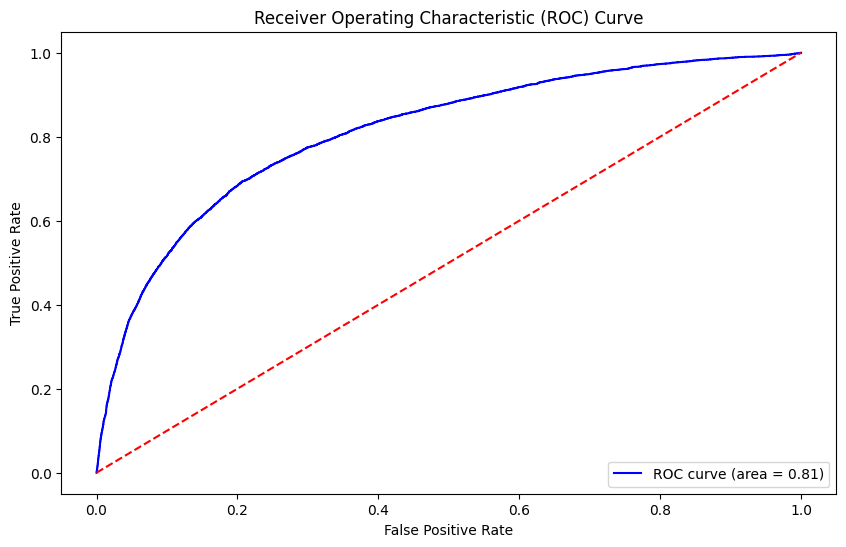

In [12]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
y_scores = model.predict_proba(X_test_pca)  # Get the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Model performs better than a random classifier!!